<a target="_blank" href="https://colab.research.google.com/github/ares2012/temp/blob/master/Open_in_Colab.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

https://openincolab.com

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import json

import numpy as np
import pandas as pd

In [ ]:
cp -r /content/drive/MyDrive/Colab\ Notebooks/my_list.txt /content

In [ ]:
file_path = '/content/my_list.txt'

with open(file_path, 'r') as f:
  keys = json.load(f)

oKEY = keys['OPENAI_API_KEY']
pKEY = keys['PINECONE_API_KEY']
hKEY = keys['huggingface.co']

In [ ]:
!pip install openai --upgrade --quiet

In [1]:
! zip Phi-3-mini-128k-instruct.zip -r /root/.cache/huggingface/hub/models--microsoft--Phi-3-mini-128k-instruct

  adding: root/.cache/huggingface/hub/models--microsoft--Phi-3-mini-128k-instruct/ (stored 0%)
  adding: root/.cache/huggingface/hub/models--microsoft--Phi-3-mini-128k-instruct/refs/ (stored 0%)
  adding: root/.cache/huggingface/hub/models--microsoft--Phi-3-mini-128k-instruct/refs/main (stored 0%)
  adding: root/.cache/huggingface/hub/models--microsoft--Phi-3-mini-128k-instruct/.no_exist/ (stored 0%)
  adding: root/.cache/huggingface/hub/models--microsoft--Phi-3-mini-128k-instruct/.no_exist/072cb7562cb8c4adf682a8e186aaafa49469eb5d/ (stored 0%)
  adding: root/.cache/huggingface/hub/models--microsoft--Phi-3-mini-128k-instruct/.no_exist/072cb7562cb8c4adf682a8e186aaafa49469eb5d/chat_template.jinja (stored 0%)
  adding: root/.cache/huggingface/hub/models--microsoft--Phi-3-mini-128k-instruct/.no_exist/072cb7562cb8c4adf682a8e186aaafa49469eb5d/model.safetensors (stored 0%)
  adding: root/.cache/huggingface/hub/models--microsoft--Phi-3-mini-128k-instruct/.no_exist/072cb7562cb8c4adf682a8e186aaaf

In [10]:
! zip Qwen--Qwen2-7B-Instruct.zip -r /root/.cache/huggingface/hub/models--Qwen--Qwen2-7B-Instruct

  adding: root/.cache/huggingface/hub/models--Qwen--Qwen2-7B-Instruct/ (stored 0%)
  adding: root/.cache/huggingface/hub/models--Qwen--Qwen2-7B-Instruct/refs/ (stored 0%)
  adding: root/.cache/huggingface/hub/models--Qwen--Qwen2-7B-Instruct/refs/main (deflated 3%)
  adding: root/.cache/huggingface/hub/models--Qwen--Qwen2-7B-Instruct/.no_exist/ (stored 0%)
  adding: root/.cache/huggingface/hub/models--Qwen--Qwen2-7B-Instruct/.no_exist/f2826a00ceef68f0f2b946d945ecc0477ce4450c/ (stored 0%)
  adding: root/.cache/huggingface/hub/models--Qwen--Qwen2-7B-Instruct/.no_exist/f2826a00ceef68f0f2b946d945ecc0477ce4450c/chat_template.jinja (stored 0%)
  adding: root/.cache/huggingface/hub/models--Qwen--Qwen2-7B-Instruct/.no_exist/f2826a00ceef68f0f2b946d945ecc0477ce4450c/model.safetensors (stored 0%)
  adding: root/.cache/huggingface/hub/models--Qwen--Qwen2-7B-Instruct/.no_exist/f2826a00ceef68f0f2b946d945ecc0477ce4450c/adapter_config.json (stored 0%)
  adding: root/.cache/huggingface/hub/models--Qwen-

In [11]:
import os
file_size = os.path.getsize('/content/Qwen--Qwen2-7B-Instruct.zip')
print(f"size: {file_size / (1024*1024*1024):.2f} GB")

size: 22.46 GB


In [9]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

torch.random.manual_seed(0)
model_name = "google/gemma-3-4b-it" #128k w/ agreement
model_name = "Qwen/Qwen2-7B-Instruct" #128k \/ YARN(RoPE+extrapolation)
model_name = "microsoft/Phi-3-mini-128k-instruct"
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    #device_map="auto",  #cuda
    torch_dtype="auto",
    trust_remote_code=False,  #True
)
tokenizer = AutoTokenizer.from_pretrained(model_name)
print("모델과 토크나이저 다운로드 완료")
#colab_local = '/root/.cache/huggingface/hub'
#zip Phi-3-mini-128k-instruct.zip -r /root/.cache/huggingface/hub/models--microsoft--Phi-3-mini-128k-instruct

messages = [
    {"role": "system", "content": "You are a helpful AI assistant."},
    {"role": "user", "content": "Can you provide ways to eat combinations of bananas and dragonfruits?"},
    {"role": "assistant", "content": "Sure! Here are some ways to eat bananas and dragonfruits together: 1. Banana and dragonfruit smoothie: Blend bananas and dragonfruits together with some milk and honey. 2. Banana and dragonfruit salad: Mix sliced bananas and dragonfruits together with some lemon juice and honey."},
    {"role": "user", "content": "What about solving an 2x + 3 = 7 equation?"},
]

pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
)

generation_args = {
    "max_new_tokens": 500,
    "return_full_text": False,
    "temperature": 0.0,
    "do_sample": False,
}

output = pipe(messages, **generation_args)
print(output[0]['generated_text'])

config.json:   0%|          | 0.00/663 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/3.56G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/3.95G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/243 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


모델과 토크나이저 다운로드 완료


The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


To solve the equation 2x + 3 = 7, follow these steps:

Step 1: Subtract 3 from both sides of the equation.
\[2x + 3 - 3 = 7 - 3\]
This simplifies to:
\[2x = 4\]

Step 2: Divide both sides by 2 to isolate x.
\[\frac{2x}{2} = \frac{4}{2}\]
This simplifies to:
\[x = 2\]

So, the solution to the equation 2x + 3 = 7 is x = 2.


In [2]:
! pip install -U captum bitsandbytes llmlingua

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from datasets import load_dataset
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
from captum.attr import LayerIntegratedGradients
from llmlingua import PromptCompressor
import collections

# 시각화 스타일 설정 (논문용)
sns.set_theme(style="white")
plt.rcParams['figure.dpi'] = 300
#plt.rcParams['font.family'] = 'serif' # 논문에서 선호하는 세리프 폰트

In [2]:
import transformers
transformers.logging.set_verbosity_info()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--NousResearch--Llama-2-7b-hf/snapshots/8efe6c9b93655b934e27bd9981e3ec13e55aee9d/config.json
Model config LlamaConfig {
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 1,
  "dtype": "float16",
  "eos_token_id": 2,
  "head_dim": 128,
  "hidden_act": "silu",
  "hidden_size": 4096,
  "initializer_range": 0.02,
  "intermed

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

loading configuration file generation_config.json from cache at /root/.cache/huggingface/hub/models--NousResearch--Llama-2-7b-hf/snapshots/8efe6c9b93655b934e27bd9981e3ec13e55aee9d/generation_config.json
Generate config GenerationConfig {
  "bos_token_id": 1,
  "do_sample": true,
  "eos_token_id": 2,
  "pad_token_id": 32000,
  "temperature": 0.9,
  "top_p": 0.6
}

Could not locate the custom_generate/generate.py inside NousResearch/Llama-2-7b-hf.


In [2]:
# ==========================================
# 1. 환경 설정 및 Phi-3 모델 로드 (1분)
# ==========================================
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Microsoft 공식 Phi-3-mini ID (3.8B)
TARGET_MODEL_ID = "microsoft/Phi-3-mini-128k-instruct"
print(f"🔹 Target Model: {TARGET_MODEL_ID} (Phi-3-mini)")

bnb_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_compute_dtype=torch.float16,
        bnb_4bit_use_double_quant=True,
)
print("Loading Phi-3 Model...")
torch.cuda.empty_cache()
# Phi-3 로드 시 trust_remote_code=True 필수
# attn_implementation="eager"는 Captum과의 호환성을 위해 설정 (SDPA 오류 방지)
# [중요] 어텐션 시각화를 위해 output_attentions=True 설정
model = AutoModelForCausalLM.from_pretrained(
        TARGET_MODEL_ID,
        quantization_config=bnb_config,
        device_map="auto",
        trust_remote_code=True,
        attn_implementation="eager",
        #TRANSFORMERS_VERBOSITY=info
        output_attentions=True
)
# model.enable_input_require_grads()
# --- ADD THIS LINE ---
# This globally disables the problematic caching mechanism.
model.config.use_cache = False
# ... continue with preparing the model for training (PEFT, etc.)

tokenizer = AutoTokenizer.from_pretrained(TARGET_MODEL_ID, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token # Phi-3 패딩 설정

COMPRESSOR_MODEL = "microsoft/llmlingua-2-bert-base-multilingual-cased-meetingbank"
compressor = PromptCompressor(model_name=COMPRESSOR_MODEL, device_map=DEVICE)

🔹 Target Model: microsoft/Phi-3-mini-128k-instruct (Phi-3-mini)
Loading Phi-3 Model...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
The following generation flags are not valid and may be ignored: ['output_attentions']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [3]:
# ==========================================
# 2. Phi-3 전용 프롬프트 포매팅
# ==========================================
def format_prompt_phi3(context, question):
      """    Phi-3의 Chat Template (<|user|>, <|assistant|>) 적용    """
      messages = [        {"role": "user", "content": f"Context:\n{context}\n\nQuestion:\n{question}\n\nAnswer based on the context:"}    ]
      # tokenize=False로 하여 완성된 문자열(Raw String)을 얻음
      return tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)


# ==========================================
# 3. XAI 분석 (Phi-3 아키텍처 대응)
# ==========================================
def get_phi3_token_importance(prompt_text, model, tokenizer):
    # 특수 토큰 처리를 위해 add_special_tokens=False 권장 (Template에 이미 포함됨)
    inputs = tokenizer(prompt_text, return_tensors="pt", add_special_tokens=False).to(model.device)
    input_ids = inputs.input_ids

    # [중요] Phi-3의 임베딩 레이어 경로 (Llama와 유사)
    # 보통 model.model.embed_tokens에 위치
    if hasattr(model, "model") and hasattr(model.model, "embed_tokens"):
        embeddings = model.model.embed_tokens
    else:
        embeddings = model.get_input_embeddings()

    # Target Function: 마지막 토큰의 Logit
    def forward_func(inputs_embeds):
        outputs = model(inputs_embeds=inputs_embeds)
        return outputs.logits[0, -1, :].max().unsqueeze(0)
    lig = LayerIntegratedGradients(forward_func, embeddings)

    # 3.8B 모델이므로 step을 조금 높여도 됨 (정확도 향상)
    attributions, _ = lig.attribute(
                inputs=embeddings(input_ids),
                baselines=embeddings(input_ids) * 0,
                n_steps=15,
                return_convergence_delta=False
    )

    scores = torch.norm(attributions, dim=-1).squeeze().tolist()
    tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
    return tokens, scores


from captum.attr import IntegratedGradients
def get_phi3_token_importance(prompt_text, model, tokenizer):
    torch.cuda.empty_cache()
    # 1. 입력 ID 추출
    inputs = tokenizer(prompt_text, return_tensors="pt", add_special_tokens=False,
                       truncation=True, max_length=1024).to(model.device)
    input_ids = inputs.input_ids

    # 2. 임베딩 레이어 찾기
    if hasattr(model, "model") and hasattr(model.model, "embed_tokens"):
        embedding_layer = model.model.embed_tokens
    elif hasattr(model, "embed_tokens"): # Llama/Gemma 일부
        embedding_layer = model.embed_tokens
    else:
        embedding_layer = model.get_input_embeddings()

    # 3. [핵심 수정] 임베딩 벡터를 미리 계산 (이것이 Captum의 Input이 됩니다)
    # 4-bit 모델 등에서 Gradient 계산을 위해 requires_grad 설정이 필요할 수 있음
    input_embeddings = embedding_layer(input_ids)

    # 4. Forward 함수 정의 (임베딩을 입력으로 받음)
    def forward_func(inputs_embeds):
        # inputs_embeds를 모델에 직접 주입
        outputs = model(inputs_embeds=inputs_embeds)
        return outputs.logits[0, -1, :].max().unsqueeze(0)

    # 5. [변경] LayerIntegratedGradients -> IntegratedGradients
    # 레이어가 아니라 '입력 텐서(input_embeddings)' 자체를 분석 대상으로 함
    ig = IntegratedGradients(forward_func)

    # 6. 속성(Attribute) 계산
    try:
        attributions, delta = ig.attribute(
            inputs=input_embeddings,
            # Baseline은 0 벡터 (All-zero embeddings)
            baselines=torch.zeros_like(input_embeddings),
            n_steps=5,
            internal_batch_size=1, # [핵심] 한 번에 1개 단계씩만 계산하여 메모리 절약
            return_convergence_delta=True
        )
    except RuntimeError as e:
      if "out of memory" in str(e):
        print("Skipping sample due to OOM.")
        torch.cuda.empty_cache()
        return [], []
      else:
        raise e

    # 7. 중요도 점수 합산 (L2 Norm)
    scores = torch.norm(attributions, dim=-1).squeeze().tolist()
    tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

    del attributions, delta, inputs, input_ids, input_embeddings
    torch.cuda.empty_cache()

    return tokens, scores


In [4]:
# ==========================================
# 4. [NEW] 논문용 시각화 함수 구현
# ==========================================
def plot_token_attribution_heatmap(tokens, scores, filename="token_attribution.png"):
    """ 토큰별 중요도 점수를 1차원 히트맵으로 시각화합니다.
          긴 문장은 여러 줄로 나누어 표시합니다.    """
    # 토큰 정제 (Phi-3 특수문자 제거)
    clean_tokens = [t.replace(' ', '').replace('Ġ', '') for t in tokens]

    # 표시할 최대 토큰 수 제한 (너무 길면 가독성 저하)
    max_display = 150
    if len(clean_tokens) > max_display:
        clean_tokens = clean_tokens[:max_display]
        scores = scores[:max_display]
        print(f"⚠️ Warning: Heatmap truncated to first {max_display} tokens.")

    # 데이터를 numpy 배열로 변환 및 정규화 (0~1)
    scores_np = np.array(scores)
    scores_norm = (scores_np - scores_np.min()) / (scores_np.max() - scores_np.min())

    # 여러 줄로 나누기 위한 설정
    tokens_per_row = 25
    num_rows = int(np.ceil(len(clean_tokens) / tokens_per_row))

    fig, axes = plt.subplots(num_rows, 1, figsize=(12, 1.5 * num_rows), sharex=False)
    if num_rows == 1: axes = [axes]

    for i in range(num_rows):
        start_idx = i * tokens_per_row
        end_idx = min((i + 1) * tokens_per_row, len(clean_tokens))
        row_tokens = clean_tokens[start_idx:end_idx]
        row_scores = scores_norm[start_idx:end_idx].reshape(1, -1)
        sns.heatmap(
                        row_scores,
                        xticklabels=row_tokens,
                        yticklabels=False,
                        cmap="YlOrRd", # 노랑->주황->빨강 컬러맵 (논문에 적합)
                        ax=axes[i],
                        cbar=(i == num_rows-1), # 마지막 줄에만 컬러바 표시
                        cbar_kws={"orientation": "horizontal", "pad": 0.2, "aspect": 30} if i == num_rows-1 else {},
                        vmin=0, vmax=1,
                        square=True,
                        linewidths=0.5
                    )
        axes[i].set_xticklabels(row_tokens, rotation=45, ha='right', fontsize=9)

    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    print(f"✅ Heatmap saved to {filename}")
    plt.close()

def plot_attention_map(attention_heads, tokens, layer_idx=-1, filename="attention_map.png"):
    """    특정 레이어의 모든 어텐션 헤드 평균을 N x N 매트릭스로 시각화합니다.    """
    # 지정된 레이어의 어텐션 가져오기 (Batch, Heads, Seq, Seq)
    layer_attention = attention_heads[layer_idx].squeeze().detach().cpu().numpy()
    # 모든 헤드에 대해 평균 계산 (Seq, Seq)
    avg_attention = np.mean(layer_attention, axis=0)

    # 토큰 정제 및 길이 제한
    clean_tokens = [t.replace(' ', '').replace('Ġ', '') for t in tokens]
    max_display = 60 # N x N은 크기가 금방 커지므로 제한을 더 작게 둠

    if len(clean_tokens) > max_display:
        clean_tokens = clean_tokens[:max_display]
        avg_attention = avg_attention[:max_display, :max_display]
        print(f"⚠️ Warning: Attention map truncated to first {max_display} tokens.")

    plt.figure(figsize=(10, 10))
    sns.heatmap(
                avg_attention,
                xticklabels=clean_tokens,
                yticklabels=clean_tokens,
                cmap="Blues", # 파란색 계열 컬러맵
                cbar=True,
                cbar_kws={"shrink": 0.8},
                square=True
    )

    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(rotation=0, fontsize=8)
    plt.title(f"Average Attention Map (Layer {layer_idx})", fontsize=14)

    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    print(f"✅ Attention map saved to {filename}")
    plt.close()

In [5]:
# ==========================================
# 5. 평가 지표 (F1 & ARR)
# ==========================================
def compute_f1(prediction, truth):
    def normalize(text):
        return text.lower().strip().replace(".", "").replace(",", "")
    pred_tokens = normalize(prediction).split()
    truth_tokens = normalize(truth).split()
    if not pred_tokens or not truth_tokens: return 0
    common = collections.Counter(pred_tokens) & collections.Counter(truth_tokens)
    num_same = sum(common.values())
    if num_same == 0: return 0
    precision = num_same / len(pred_tokens)
    recall = num_same / len(truth_tokens)
    return (2 * precision * recall) / (precision + recall)

def calculate_arr(orig_tokens, orig_scores, compressed_text):
    pairs = sorted(zip(orig_tokens, orig_scores), key=lambda x: x[1], reverse=True)
    k = int(len(pairs) * 0.2)
    # Phi-3 토큰 정제 ( _ 제거 등)
    top_k = [t[0].replace(' ', '').lower()
    for t in pairs[:k] if len(t[0]) > 2 and '<' not in t[0]]
    if not top_k: return 0
    hit = sum(1 for t in top_k if t in compressed_text.lower())
    return hit / len(top_k)

In [6]:
# ==========================================
# 6. 메인 실행 루프 (1개 샘플 상세 분석)
# ==========================================
# 0. 데이터셋 로드(1분)
dataset = load_dataset("hotpot_qa", "distractor", split="validation")#, trust_remote_code=True)
SAMPLE_ID = 3 # 분석하고 싶은 샘플 번호 지정
print(f"\n🚀 Analyzing Sample ID: {SAMPLE_ID}")

data = dataset[SAMPLE_ID]
context = " ".join(["".join(sent) for sent in data['context']['sentences']])
question = data['question']


🚀 Analyzing Sample ID: 3


In [7]:
# 1. 프롬프트 준비
full_prompt = format_prompt_phi3(context, question)
full_prompt

'<|user|>\nContext:\nEsma Sultan (21 March 1873 – 7 May 1899) was an Ottoman princess, the daughter of Sultan Abdülaziz and his wife Gevheri Kadın, herself the daughter of Salih Bey Svatnba. She was the half-sister of Abdülmecid II, the last Caliph of the Muslim world. The Great Mosque of Algiers (Arabic: الجامع الكبير\u200e \u200e , "Jemaa Kebir") or “Djama’a al-Kebir” (meaning Great Mosque) is a mosque in Algiers, Algeria, located very close to Algiers Harbor. An inscription on the minbar (منبر) or the pulpit testifies to fact that the mosque was built in 1097. It is also known by several other names such as Grand Mosque d\'Alger, Djamaa al-Kebir, El Kebir Mosque and Jami Masjid. It is one of the few remaining examples of Almoravid architecture. It is the oldest mosque in Algiers and is said to be the oldest mosque in Algeria after Sidi Okba Mosque. It was built under sultan Ali ibn Yusuf. Its minaret dates from 1332 (1324 in some sources) and was built by the Ziyyanid Sultan of Tlem

In [8]:
# 2. Captum 중요도 분석 (히트맵용)
print("Computing token attributions...")
orig_tokens, orig_scores = get_phi3_token_importance(full_prompt, model, tokenizer)
orig_tokens, orig_scores

Computing token attributions...


(['<|user|>',
  '▁Context',
  ':',
  '<0x0A>',
  'Es',
  'ma',
  '▁Sultan',
  '▁(',
  '2',
  '1',
  '▁March',
  '▁',
  '1',
  '8',
  '7',
  '3',
  '▁–',
  '▁',
  '7',
  '▁May',
  '▁',
  '1',
  '8',
  '9',
  '9',
  ')',
  '▁was',
  '▁an',
  '▁Ott',
  'oman',
  '▁prin',
  'cess',
  ',',
  '▁the',
  '▁daughter',
  '▁of',
  '▁Sultan',
  '▁Abd',
  'ü',
  'laz',
  'iz',
  '▁and',
  '▁his',
  '▁wife',
  '▁Ge',
  'v',
  'her',
  'i',
  '▁K',
  'ad',
  'ı',
  'n',
  ',',
  '▁herself',
  '▁the',
  '▁daughter',
  '▁of',
  '▁S',
  'ali',
  'h',
  '▁Bey',
  '▁S',
  'vat',
  'n',
  'ba',
  '.',
  '▁She',
  '▁was',
  '▁the',
  '▁half',
  '-',
  's',
  'ister',
  '▁of',
  '▁Abd',
  'ül',
  'm',
  'ec',
  'id',
  '▁II',
  ',',
  '▁the',
  '▁last',
  '▁C',
  'ali',
  'ph',
  '▁of',
  '▁the',
  '▁Muslim',
  '▁world',
  '.',
  '▁The',
  '▁Great',
  '▁Mos',
  'que',
  '▁of',
  '▁Al',
  'gi',
  'ers',
  '▁(',
  'A',
  'rab',
  'ic',
  ':',
  '▁ال',
  'ج',
  'ا',
  'م',
  'ع',
  '▁ال',
  'ك',
  'ب',
  'ي',
 

In [ ]:
# [NEW] 시각화 1: 토큰 중요도 히트맵 그리기
plot_token_attribution_heatmap(orig_tokens, orig_scores, filename=f"heatmap_sample_{SAMPLE_ID}.png")

⚠️ Warning: Heatmap truncated to first 150 tokens.


Extracting attention weights...
⚠️ Warning: Attention map truncated to first 60 tokens.


KeyboardInterrupt: 

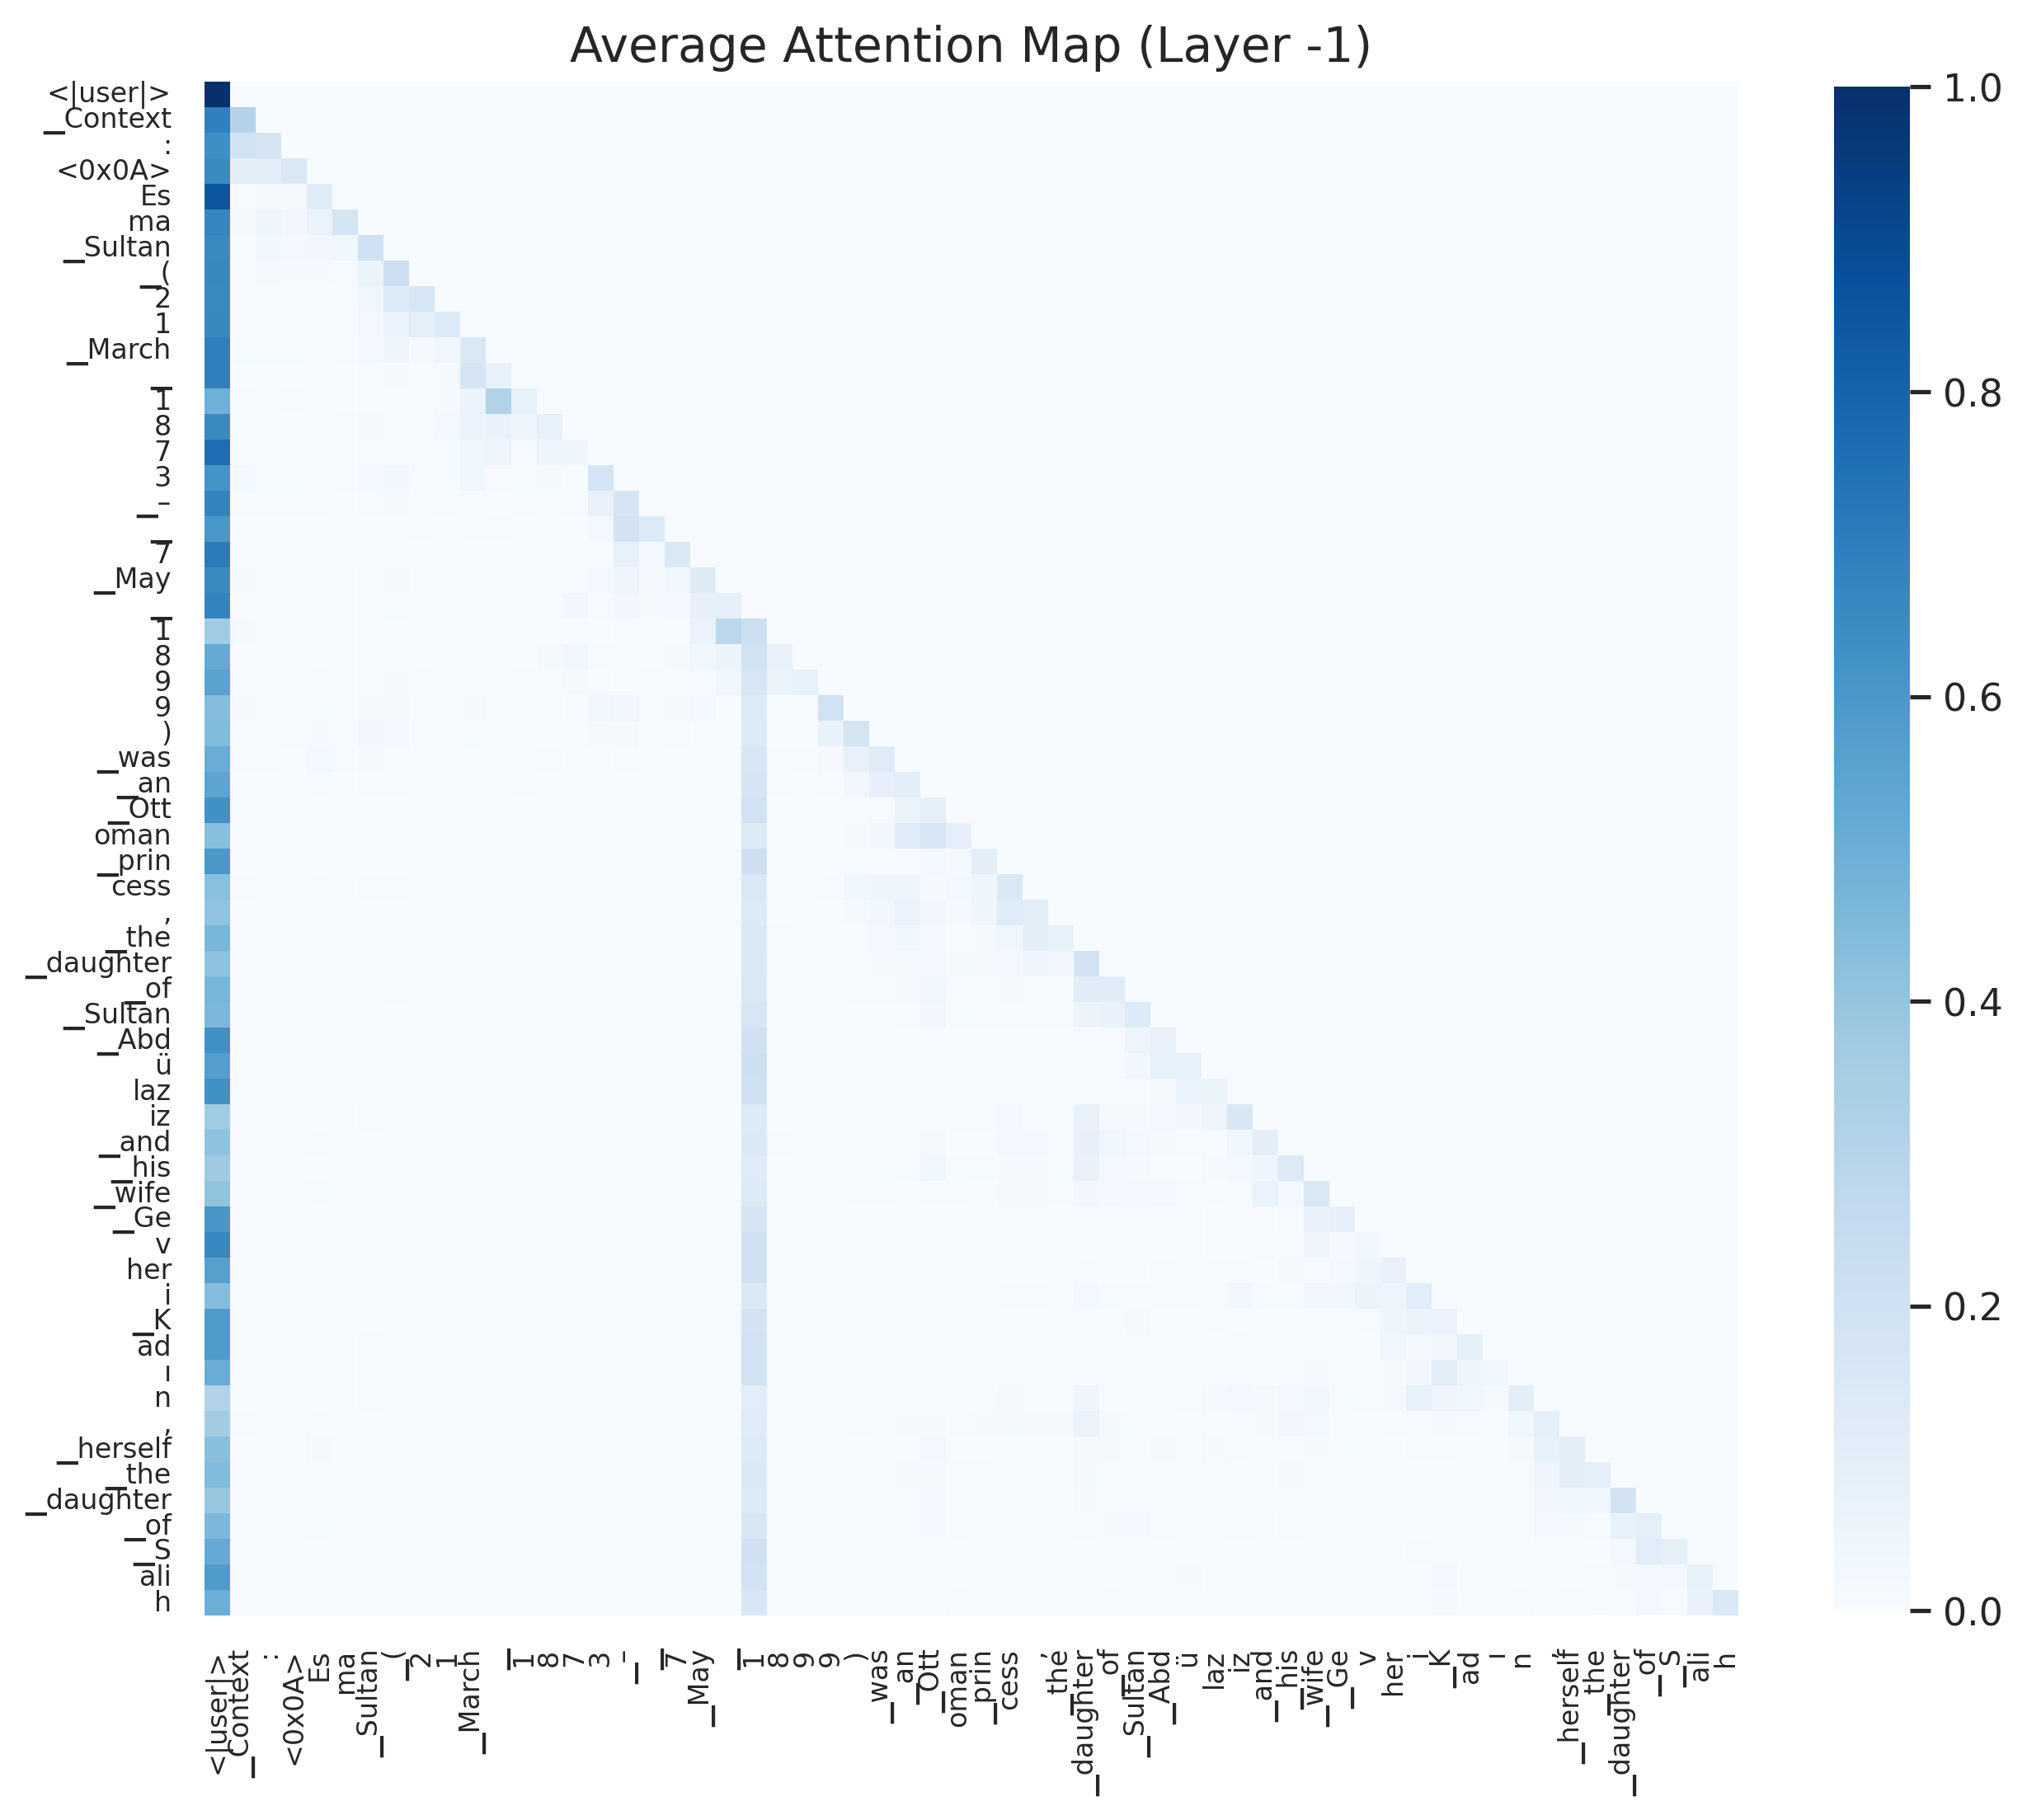

In [11]:
# 3. 어텐션 가중치 추출 (어텐션 맵용)
print("Extracting attention weights...")
inputs = tokenizer(full_prompt, return_tensors="pt", add_special_tokens=False).to(DEVICE)
with torch.no_grad():
    outputs = model(**inputs)
    # outputs.attentions는 레이어별 (Batch, Heads, Seq, Seq) 튜플
    attention_weights = outputs.attentions

# [NEW] 시각화 2: 마지막 레이어의 어텐션 맵 그리기
# Phi-3-mini는 32개 레이어를 가짐. index -1은 마지막 레이어.
plot_attention_map(attention_weights, orig_tokens, layer_idx=-1, filename=f"attention_map_sample_{SAMPLE_ID}.png")

print("\n✨ Analysis Complete. Check the saved image files.")

In [14]:
# ==========================================
# 7. 실험 루프 실행
# ==========================================
dataset = load_dataset("hotpot_qa", "distractor", split="validation")
results = []
NUM_SAMPLES = 5

print(f"\n🚀 Experiment Start: {TARGET_MODEL_ID}")

for i in tqdm(range(NUM_SAMPLES)):
    data = dataset[i]
    context = " ".join(["".join(sent) for sent in data['context']['sentences']])
    question = data['question']
    gold_answer = data['answer']

    # 1. Phi-3 포맷팅
    full_prompt = format_prompt_phi3(context, question)

    # 2. XAI 분석 (원본)
    try:
        orig_tokens, orig_scores = get_phi3_token_importance(full_prompt, model, tokenizer)
    except Exception as e:
        print(f"Skipping {i}: {e}")
        continue

    # 3. 압축 (LLMLingua)
    # Phi-3의 태그(<|user|>)가 압축 과정에서 깨질 수 있으므로,
    # 문맥 부분만 압축하고 다시 템플릿을 입히는 것이 정석이나,
    # LLMLingua-2는 태그를 보존하는 경향이 있어 전체를 넣습니다.
    compressed_res = compressor.compress_prompt(
        full_prompt.split("\n"),
        rate=0.5,
        #power=0.5,
        iterative_size=100
    )
    compressed_prompt = compressed_res['compressed_prompt']

    # 4. 추론 (Inference)
    input_ids = tokenizer(compressed_prompt, return_tensors="pt").input_ids.to(DEVICE)
    with torch.no_grad():
        output_ids = model.generate(
          input_ids,
          max_new_tokens=50,
          do_sample=False, # 재현성을 위해 Greedy
          pad_token_id=tokenizer.eos_token_id
        )

        # 답변 디코딩 (입력 프롬프트 제외)
        generated_text = tokenizer.decode(output_ids[0][input_ids.shape[1]:], skip_special_tokens=True)

    # 5. 결과 기록
    arr = calculate_arr(orig_tokens, orig_scores, compressed_prompt)
    f1 = compute_f1(generated_text, gold_answer)
    results.append({
        "id": i,
        "compression_rate": 1 - (len(compressed_prompt)/len(full_prompt)),
        "arr": arr,
        "f1_score": f1,
        "generated": generated_text,
        "gold": gold_answer
    })

# 결과 출력
df = pd.DataFrame(results)
print("\n📊 Phi-3-mini Experiment Results")
print(f"Avg ARR: {df['arr'].mean():.4f}")
print(f"Avg F1:  {df['f1_score'].mean():.4f}")
print(df[['id', 'arr', 'f1_score', 'generated']].head())


🚀 Experiment Start: microsoft/Phi-3-mini-128k-instruct


  0%|          | 0/5 [00:00<?, ?it/s]

Skipping sample due to OOM.


TypeError: BertForTokenClassification.forward() got an unexpected keyword argument 'past_key_values'